In [41]:
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split

In [25]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# x_train = x_train.astype("float32") / 255.0
# y_train = np.squeeze(y_train)
# x_test = x_test.astype("float32") / 255.0
# y_test = np.squeeze(y_test)

In [18]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

50000 50000 10000 10000


In [28]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
from matplotlib import pyplot as plt

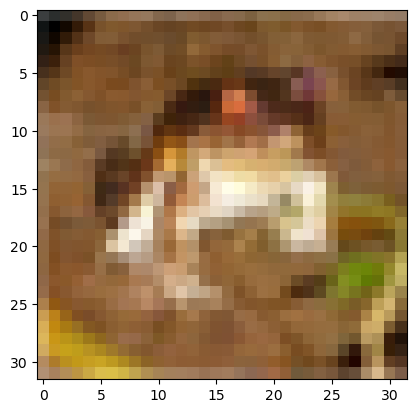

In [22]:
plt.imshow(x_train[0])

In [ ]:
Image.res

In [42]:
y_train[0]

array([6], dtype=uint8)

In [43]:
np.squeeze(y_train[0])

array(6, dtype=uint8)

In [8]:
df_photoReview_001_selected_embeddingpre=pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\드라이브\df_photoReview_001_selected_embeddingpre.csv", dtype=object)

In [9]:
df_photoReview_001_selected_embeddingpre

,goodsId_x,reviewIdPhoto_x,reviewDatePhoto_x,reviewImageUrlPhoto,major_category_x,mid_category_x,goods_id,goods_image,key,anchor,...,reviewIdPhoto_y,reviewDatePhoto_y,major_category_y,mid_category_y,image_path_review_local,image_path_sample_local,image_path_sample_drive,image_path_review_drive,image_path_negative_local,image_path_negative_drive
0,2479585,35753611,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/2479585...,001,001001,2479585,https://image.msscdn.net/images/goods_img/2022...,2479585/https://image.msscdn.net/images/goods_...,https://image.msscdn.net/images/goods_img/2022...,...,35753611,며칠전으로 표시된 리뷰,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
1,2479585,35753611,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/2479585...,001,001001,2479585,https://image.msscdn.net/images/goods_img/2022...,2479585/https://image.msscdn.net/images/goods_...,https://image.msscdn.net/images/goods_img/2022...,...,35753611,며칠전으로 표시된 리뷰,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
2,1876392,34475524,2022.11.04,https://image.msscdn.net/data/estimate/1876392...,001,001001,1876392,https://image.msscdn.net/images/goods_img/2021...,1876392/https://image.msscdn.net/images/goods_...,https://image.msscdn.net/images/goods_img/2021...,...,34475524,2022.11.04,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
3,1753093,30327286,2022.09.05,https://image.msscdn.net/data/estimate/1753093...,001,001001,1753093,https://image.msscdn.net/images/goods_img/2021...,1753093/https://image.msscdn.net/images/goods_...,https://image.msscdn.net/images/goods_img/2021...,...,30327286,2022.09.05,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
4,1010593,33640215,2022.10.15,https://image.msscdn.net/data/estimate/1010593...,001,001001,1010593,https://image.msscdn.net/images/goods_img/2019...,1010593/https://image.msscdn.net/images/goods_...,https://image.msscdn.net/images/goods_img/2019...,...,33640215,2022.10.15,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1466673,18676906,2021.07.31,https://image.msscdn.net/data/estimate/1466673...,001,001011,1466673,https://image.msscdn.net/images/goods_img/2020...,1466673/https://image.msscdn.net/images/goods_...,https://image.msscdn.net/images/goods_img/2020...,...,18676906,2021.07.31,001,001011,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
996,1466673,18676906,2021.07.31,https://image.msscd

In [10]:
df_photoReview_001_selected_embeddingpre.\
index[df_photoReview_001_selected_embeddingpre['image_path_review_local'].str.contains('2740138_0_gallery_6391bdf4d5625.jpg')].tolist()

[361]

In [12]:
df_photoReview_001_selected_embeddingpre.drop([361],axis=0, inplace=True)

In [14]:
df_photoReview_001_selected_embeddingpre.reset_index()

,index,goodsId_x,reviewIdPhoto_x,reviewDatePhoto_x,reviewImageUrlPhoto,major_category_x,mid_category_x,goods_id,goods_image,key,...,reviewIdPhoto_y,reviewDatePhoto_y,major_category_y,mid_category_y,image_path_review_local,image_path_sample_local,image_path_sample_drive,image_path_review_drive,image_path_negative_local,image_path_negative_drive
0,0,2479585,35753611,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/2479585...,001,001001,2479585,https://image.msscdn.net/images/goods_img/2022...,2479585/https://image.msscdn.net/images/goods_...,...,35753611,며칠전으로 표시된 리뷰,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
1,1,2479585,35753611,며칠전으로 표시된 리뷰,https://image.msscdn.net/data/estimate/2479585...,001,001001,2479585,https://image.msscdn.net/images/goods_img/2022...,2479585/https://image.msscdn.net/images/goods_...,...,35753611,며칠전으로 표시된 리뷰,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
2,2,1876392,34475524,2022.11.04,https://image.msscdn.net/data/estimate/1876392...,001,001001,1876392,https://image.msscdn.net/images/goods_img/2021...,1876392/https://image.msscdn.net/images/goods_...,...,34475524,2022.11.04,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
3,3,1753093,30327286,2022.09.05,https://image.msscdn.net/data/estimate/1753093...,001,001001,1753093,https://image.msscdn.net/images/goods_img/2021...,1753093/https://image.msscdn.net/images/goods_...,...,30327286,2022.09.05,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
4,4,1010593,33640215,2022.10.15,https://image.msscdn.net/data/estimate/1010593...,001,001001,1010593,https://image.msscdn.net/images/goods_img/2019...,1010593/https://image.msscdn.net/images/goods_...,...,33640215,2022.10.15,001,001001,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,1466673,18676906,2021.07.31,https://image.msscdn.net/data/estimate/1466673...,001,001011,1466673,https://image.msscdn.net/images/goods_img/2020...,1466673/https://image.msscdn.net/images/goods_...,...,18676906,2021.07.31,001,001011,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...,/content/drive/Othercomputers/내 노트북/df_ph...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,/content/drive/Othercomputers/내 노트북/df_ph...
995,996,1466673,18676906,2021.07.31,https://image.msscdn.net/data/estimate/1466673...,001,001011,1466673,https://image.msscdn.net/images/goods_img/2020...,1466673/https://image.msscdn.net/images/goods_...,...,18676906,2021.07.31,001,001011,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\df_photoR..

In [16]:
sub_anchor = df_photoReview_001_selected_embeddingpre.image_path_sample_local.to_list()
sub_positive = df_photoReview_001_selected_embeddingpre.image_path_review_local.to_list()

In [37]:
def myPreprocess_image_fin(fname):
    try:
        image_string = tf.io.read_file(fname)
        image = tf.image.decode_jpeg(image_string, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, (224,224,3)[:2]) # TARGET_SHAPE
        image = image.numpy()
        return image
    except:
        print(fname)

In [38]:
anchor_tensor = list()
for i in sub_anchor:
    k = myPreprocess_image_fin(i)
    anchor_tensor.append(k)

positive_tensor = list()
for i in sub_positive:
    k = myPreprocess_image_fin(i)
    positive_tensor.append(k)
    


In [40]:
anchor_tensor[0]

(224, 224, 3)

In [45]:
labels = np.array(df_photoReview_001_selected_embeddingpre["mid_category_y"])

In [56]:
labels = []
for i, row in df_photoReview_001_selected_embeddingpre.iterrows():
    element = np.fromstring(row["mid_category_y"], dtype='uint8')
    labels.append(element)
np.asarray(labels)

C:\Users\panda\AppData\Local\Temp\ipykernel_16068\2151250540.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  element = np.fromstring(row["mid_category_y"], dtype='uint8')


array([[48, 48, 49, 48, 48, 49],
       [48, 48, 49, 48, 48, 49],
       [48, 48, 49, 48, 48, 49],
       ...,
       [48, 48, 49, 48, 49, 49],
       [48, 48, 49, 48, 49, 49],
       [48, 48, 49, 48, 49, 49]], dtype=uint8)

In [53]:
labels[0]

array([48, 48, 49, 48, 48, 49], dtype=uint8)